# Custom DFT for hi-res low-freqs spectrograms

In [0]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams['figure.figsize'] = [12, 12]

In [0]:
N = 512
t = np.linspace(0, 1, N)
f = np.linspace(0, N//2, N)
# f = np.linspace(0, N//4, N).reshape(-1, 1)

T, F = np.meshgrid(t, f)

In [0]:
# (f*t).shape
E.shape

(512, 512)

In [0]:
E = np.exp(-2j * np.pi * F * T)
# E = np.exp(-2j * np.pi * f * t)

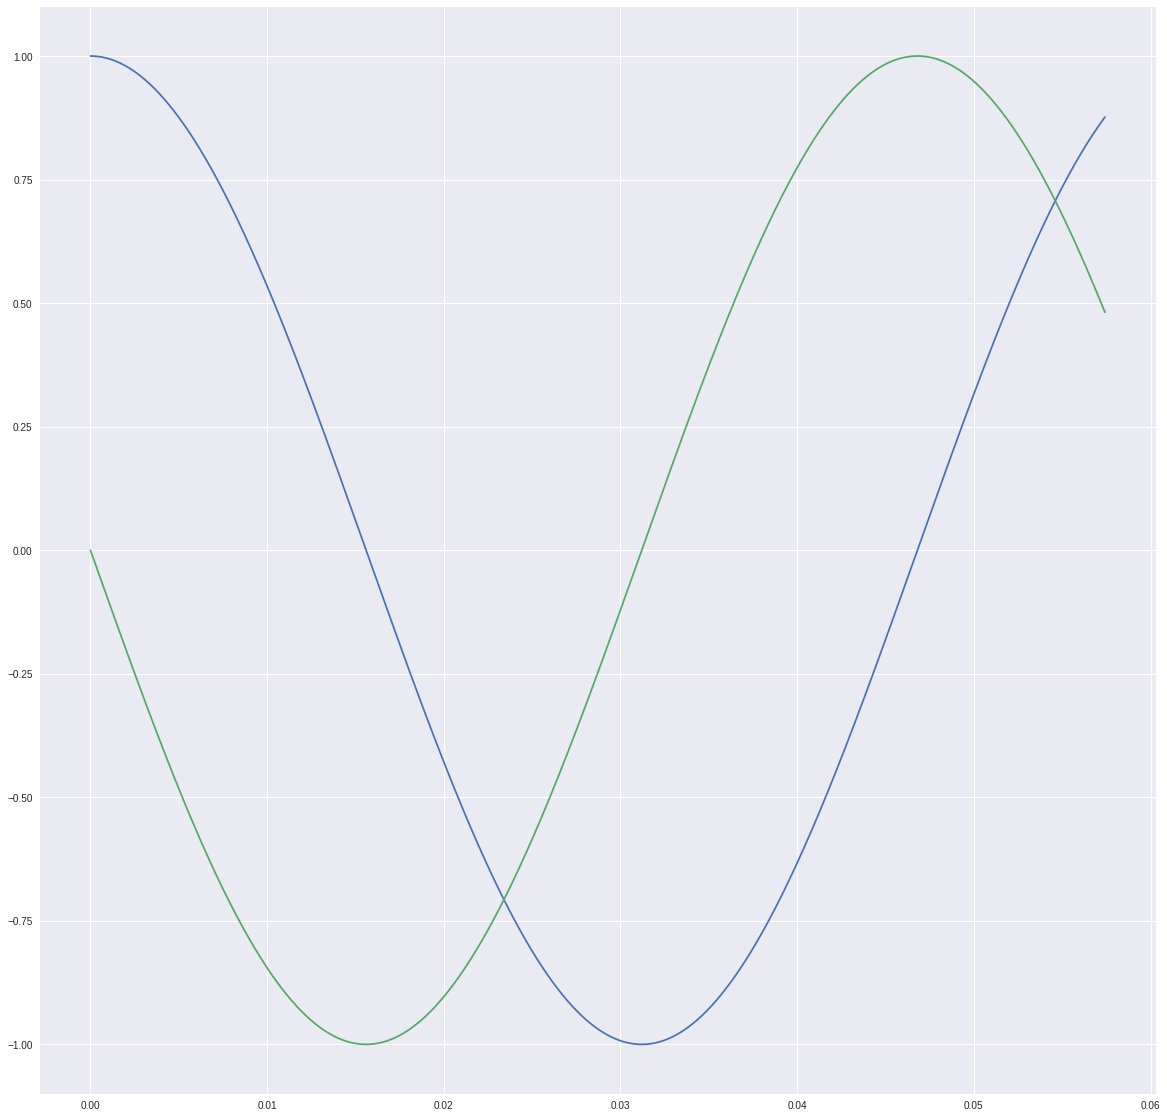

In [49]:
i = 2
plt.plot(t, np.real(E[i]))
plt.plot(t, np.imag(E[i]))

In [0]:
# plt.imshow(np.real(E))
# plt.imshow(np.imag(E))
# plt.savefig('ff.png', , dpi=300)
with open('ff.png', 'wb') as f:
    plt.imsave(f, np.imag(E), cmap='viridis', origin='lower')

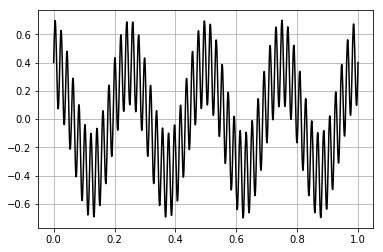

In [0]:
N = 1024
# t_end = 8
t_end = 1
t = np.linspace(0, t_end, N)
# t = np.arange(t_end)
rate = N / t_end
c0 = 0.4 * np.cos(2*np.pi * 4 * t)
s0 = 0.3 * np.sin(2*np.pi * 51 * t)
signal = c0 + s0 

plt.grid()
plt.plot(t, signal, 'k-')

In [0]:
f = np.linspace(0, N//4, N*2)
T, F = np.meshgrid(t, f)
E = np.exp(-2j * np.pi * F * T)

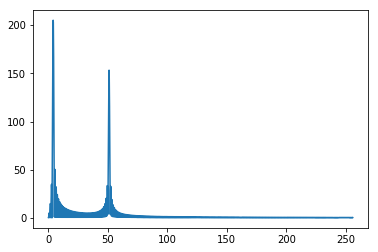

In [0]:
corr = E @ signal
# magnitude = 20 * np.log10(np.abs(corr))
magnitude = np.abs(corr)

# slic = 100

# plt.plot(f[:slic], magnitude[:slic])
plt.plot(f, magnitude)

# corr.shape
# corr

# Spectrogram helper functions

# Unoptimised spectrogram using `for` loop
```
  1 second = 44100 samples
1/4 second = 11025 samples
```

In [19]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sad.wav to sad.wav
User uploaded file "sad.wav" with length 3072044 bytes


In [2]:
!ls

c-c#-192kHz (1).wav  c-c#-192kHz.wav  datalab  ff.png  todi.wav


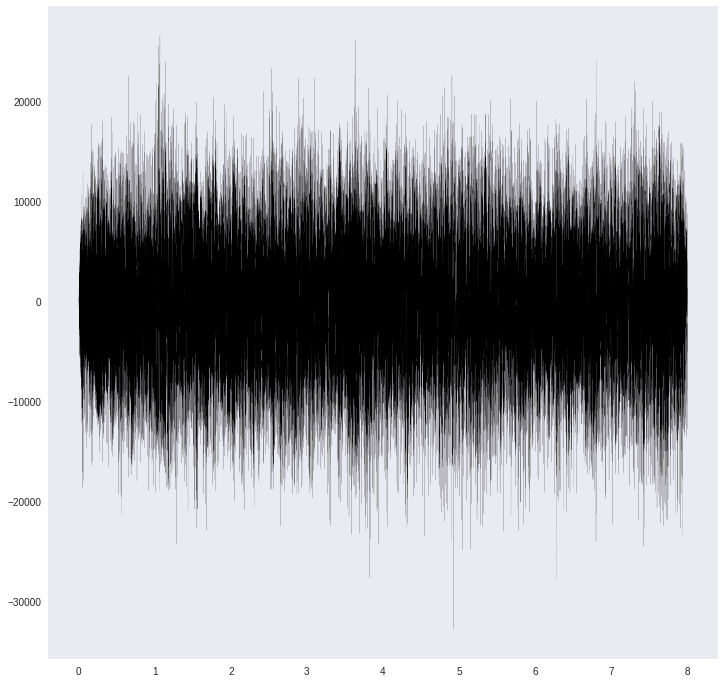

In [24]:
from scipy.io import wavfile
# rate, x = wavfile.read('bar.wav')

rate, x = wavfile.read('sad.wav')
# rate, x = wavfile.read('todi.wav')
# rate, x = wavfile.read('c-c#-192kHz.wav')
# rate, x = wavfile.read('malkauns-aroh.wav')
# left_channel  = x[:, 0]
# right_channel = x[:, 1]
# signal = left_channel
signal = x
# signal = (left_channel + right_channel) / 2 # average left and right channels to mono signal
N = len(signal)
N
t = np.linspace(0, N/rate, N)

plt.grid()
plt.plot(t, signal, 'k-', linewidth=0.1)

In [13]:
# left_channel.shape
# right_channel.shape
N

768000

In [25]:
nperseg  = 11025//2
noverlap = nperseg // 100 * 92
step = nperseg - noverlap


f_N = nperseg // 1

spectrogram = np.empty( ((signal.shape[-1] - noverlap) // step, f_N) )
# spectrogram = np.empty( (nperseg, (signal.shape[-1] - noverlap) // step)  )
print(spectrogram.shape)

t_chunk = np.linspace(0, nperseg / rate, nperseg)
# f = np.linspace(30, nperseg//2, f_N) # second arg: nperseg//2 (Nyquist limit)
f = np.geomspace(30, nperseg//2, f_N) # second arg: nperseg//2 (Nyquist limit)


T_chunk, F_chunk = np.meshgrid(t_chunk, f)
E = np.exp(-2j * np.pi * F_chunk * T_chunk)
print('E', E.shape)
j = 0
for i in range(0, N, step):
    print(j, end=' ')
    if j % 40 == 0:
        print('\n', end='')
    chunk = signal[i : i + nperseg]
    
    if E.shape[1] == chunk.shape[0]:
#         print(chunk.shape, np.hanning(nperseg).shape)
#         chunk = chunk * np.hamming(nperseg)
#         chunk = chunk * np.bartlett(nperseg)
        chunk = chunk * np.blackman(nperseg)
        corr = E @ chunk
#         corr = corr * 0.001 * np.geomspace(1, 10000, f_N) # high freqs saturation
  
        magnitude = np.abs(corr)
    
#         print(spectrogram.shape, magnitude.shape)
        spectrogram[j] = magnitude
        j += 1

(3387, 5512)
E (5512, 5512)
0 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 
41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 
81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268

515 516 517 518 519 520 
521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 
561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 
601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 
641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 
681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720 
721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756 757 758 759 760 
761 762 7

1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 
1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 
1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113 1114 1115 1116 1117 1118 1119 1120 
1121 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 
1161 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 1195 1196 1197 1198 1199 1200 
1201 1202 1203 1204 1205 1206 1207 1208 1209 1210 

1458 1459 1460 1461 1462 1463 1464 1465 1466 1467 1468 1469 1470 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 
1481 1482 1483 1484 1485 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513 1514 1515 1516 1517 1518 1519 1520 
1521 1522 1523 1524 1525 1526 1527 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555 1556 1557 1558 1559 1560 
1561 1562 1563 1564 1565 1566 1567 1568 1569 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597 1598 1599 1600 
1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639 1640 
1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653 1654 1655 1656 

1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 
1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 
2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 
2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080 
2081 2082 2083 2084 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2097 2098 2099 2100 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111 2112 2113 2114 2115 2116 2117 2118 2119 2120 
2121 2122 

2380 2381 2382 2383 2384 2385 2386 2387 2388 2389 2390 2391 2392 2393 2394 2395 2396 2397 2398 2399 2400 
2401 2402 2403 2404 2405 2406 2407 2408 2409 2410 2411 2412 2413 2414 2415 2416 2417 2418 2419 2420 2421 2422 2423 2424 2425 2426 2427 2428 2429 2430 2431 2432 2433 2434 2435 2436 2437 2438 2439 2440 
2441 2442 2443 2444 2445 2446 2447 2448 2449 2450 2451 2452 2453 2454 2455 2456 2457 2458 2459 2460 2461 2462 2463 2464 2465 2466 2467 2468 2469 2470 2471 2472 2473 2474 2475 2476 2477 2478 2479 2480 
2481 2482 2483 2484 2485 2486 2487 2488 2489 2490 2491 2492 2493 2494 2495 2496 2497 2498 2499 2500 2501 2502 2503 2504 2505 2506 2507 2508 2509 2510 2511 2512 2513 2514 2515 2516 2517 2518 2519 2520 
2521 2522 2523 2524 2525 2526 2527 2528 2529 2530 2531 2532 2533 2534 2535 2536 2537 2538 2539 2540 2541 2542 2543 2544 2545 2546 2547 2548 2549 2550 2551 2552 2553 2554 2555 2556 2557 2558 2559 2560 
2561 2562 2563 2564 2565 2566 2567 2568 2569 2570 2571 2572 2573 2574 2575 2576 2577 2578 

2851 2852 2853 2854 2855 2856 2857 2858 2859 2860 2861 2862 2863 2864 2865 2866 2867 2868 2869 2870 2871 2872 2873 2874 2875 2876 2877 2878 2879 2880 
2881 2882 2883 2884 2885 2886 2887 2888 2889 2890 2891 2892 2893 2894 2895 2896 2897 2898 2899 2900 2901 2902 2903 2904 2905 2906 2907 2908 2909 2910 2911 2912 2913 2914 2915 2916 2917 2918 2919 2920 
2921 2922 2923 2924 2925 2926 2927 2928 2929 2930 2931 2932 2933 2934 2935 2936 2937 2938 2939 2940 2941 2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955 2956 2957 2958 2959 2960 
2961 2962 2963 2964 2965 2966 2967 2968 2969 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997 2998 2999 3000 
3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039 3040 
3041 3042 3043 3044 3045 3046 3047 3048 3049 

3316 3317 3318 3319 3320 
3321 3322 3323 3324 3325 3326 3327 3328 3329 3330 3331 3332 3333 3334 3335 3336 3337 3338 3339 3340 3341 3342 3343 3344 3345 3346 3347 3348 3349 3350 3351 3352 3353 3354 3355 3356 3357 3358 3359 3360 
3361 3362 3363 3364 3365 3366 3367 3368 3369 3370 3371 3372 3373 3374 3375 3376 3377 3378 3379 3380 3381 3382 3383 3384 3385 3386 3387 3387 3387 3387 3387 3387 3387 3387 3387 3387 3387 3387 

# Sawtooth decomposition

In [13]:
from scipy.signal import sawtooth
nperseg  = 11025//2
noverlap = nperseg // 100 * 92
step = nperseg - noverlap


f_N = nperseg // 1

spectrogram = np.empty( ((signal.shape[-1] - noverlap) // step, f_N) )
# spectrogram = np.empty( (nperseg, (signal.shape[-1] - noverlap) // step)  )
print(spectrogram.shape)

t_chunk = np.linspace(0, nperseg / rate, nperseg)
f = np.geomspace(30, nperseg//2, f_N) # second arg: nperseg//2 (Nyquist limit)
T_chunk, F_chunk = np.meshgrid(t_chunk, f)

E = sawtooth(2 * np.pi * F_chunk * T_chunk - np.pi / 2) - 1j * sawtooth(2 * np.pi * F_chunk * T_chunk - np.pi)

j = 0
for i in range(0, N, step):
    print(j, end=' ')
    if j % 40 == 0:
        print('\n', end='')
    chunk = signal[i : i + nperseg]
    
    if E.shape[1] == chunk.shape[0]:
        chunk = chunk * np.blackman(nperseg)
        corr = E @ chunk
        magnitude = np.abs(corr)
    
#         print(spectrogram.shape, magnitude.shape)
        spectrogram[j] = magnitude
        j += 1

(396, 5512)


KeyboardInterrupt: ignored

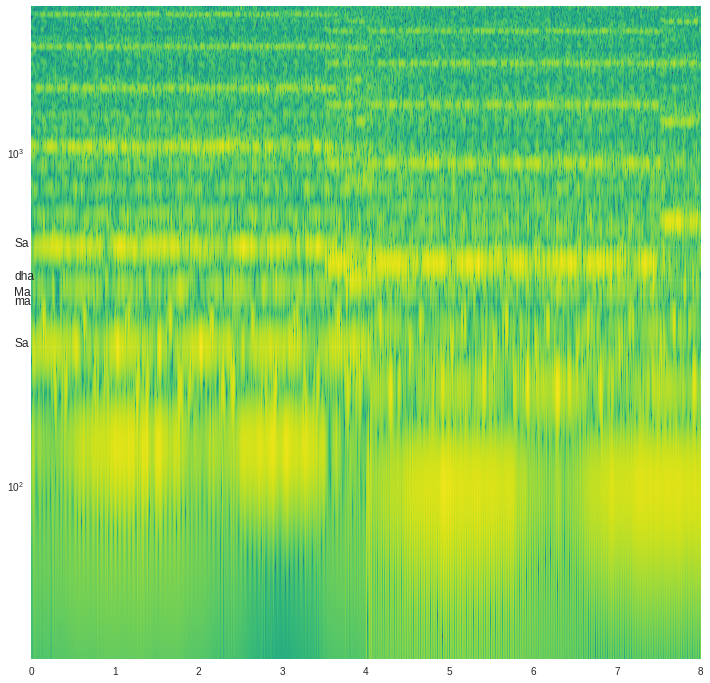

In [26]:
t_for_spectrogram = np.linspace(0, N/rate, j)
T, F = np.meshgrid(t_for_spectrogram, f)

spec_filtered = np.copy(spectrogram.T)
spec_filtered = 20 * np.log10(spec_filtered)
# print(T.shape, F.shape, spec_filtered.shape)
# spec_filtered[spec_filtered < 2000000] = 0


# plt.imshow(20 * np.log10(spectrogram.T), origin='lower', cmap='viridis')
# plt.imshow(spec_filtered.T, origin='lower', cmap='viridis')
plt.pcolormesh(T, F, spec_filtered, cmap='viridis')

freqlines = np.array([261, 350, 372, 415, 522])
plt.semilogy()
plt.hlines(freqlines, xmin=0, xmax=N/rate, linewidth=0.1, color='w', label='Sa')
plt.text(-0.2, 261, 'Sa', fontsize=12)
plt.text(-0.2, 350, 'ma', fontsize=12)
plt.text(-0.2, 372, 'Ma', fontsize=12)
plt.text(-0.2, 415, 'dha', fontsize=12)
plt.text(-0.2, 522, 'Sa', fontsize=12)
# plt.hlines(f, xmin=0, xmax=400, linewidth=1, color='w')
# plt.axhline(y=261, linewidth=1, color='w')
plt.grid(False)
plt.show()

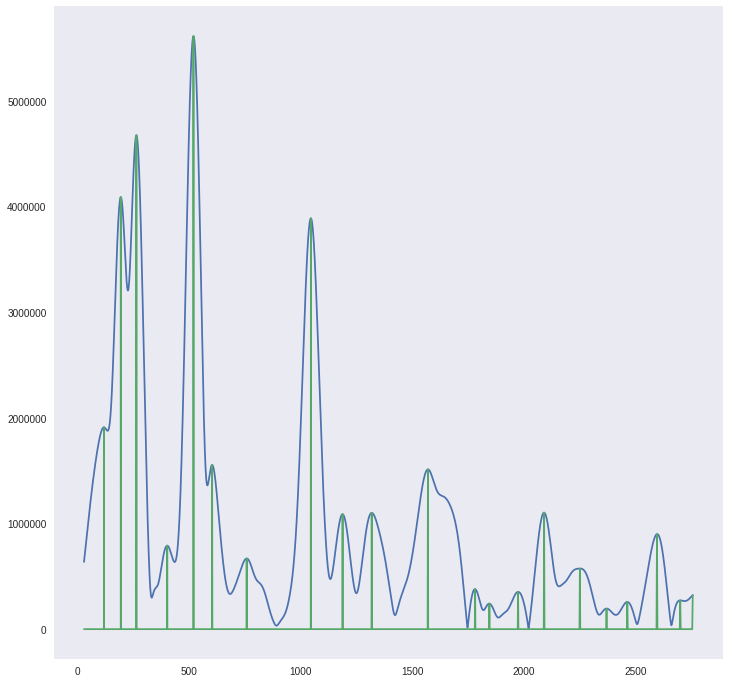

In [63]:
a = spectrogram[123]

# stackoverflow.com/a/4625132/4204843
# z = np.r_[True, a[1:] < a[:-1]] & np.r_[a[:-1] < a[1:], True] # minimas
z = np.r_[True, a[1:] > a[:-1]] & np.r_[a[:-1] > a[1:], True] # maximas

gg = np.zeros(len(a))
gg[z] = a[z]
plt.plot(f, spectrogram[123])
plt.plot(f, gg)
plt.grid(False)

In [62]:
cc = np.array([0, 1, 2, 3, 4, 2, 1, 2, 4, 7 ,8, 7, 1])
nn = len(cc)
zz = np.r_[True, cc[1:] > cc[:-1]] & np.r_[cc[:-1] > cc[1:], True] # maximas
print(zz)
gg = np.zeros(nn)

gg[zz] = cc[zz]
gg
# cc[zz]

[False False False False  True False False False False False  True False
 False]


array([0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 8., 0., 0.])

In [0]:
f = np.linspace(0, N//4, N*2)
T, F = np.meshgrid(t, f)
E = np.exp(-2j * np.pi * F * T)

corr = E @ signal
# magnitude = 20 * np.log10(np.abs(corr))
magnitude = np.abs(corr)

# slic = 100

# plt.plot(f[:slic], magnitude[:slic])
plt.plot(f, magnitude)

# corr.shape
# corr

In [0]:
x = np.arange(8)
x
nperseg  = 3
noverlap = 2
step = nperseg - noverlap

((x.shape[-1] - noverlap) // step, nperseg)
# x.shape
# x.shape[-1] 

(6, 3)

In [34]:
x = np.arange(10)
x.sort()
x[-2]

8